In [ ]:
pip install download


In [ ]:
pip install scipy


In [48]:
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
#This code is for Swing trading

In [49]:
stock_tickers = [
    "RELIANCE.NS",  # Reliance Industries Limited
    "TCS.NS",       # Tata Consultancy Services Limited
    "HDFCBANK.NS",  # HDFC Bank Limited
    "INFY.NS",      # Infosys Limited
    "HINDUNILVR.NS",# Hindustan Unilever Limited
    "ICICIBANK.NS", # ICICI Bank Limited
    "KOTAKBANK.NS", # Kotak Mahindra Bank Limited
    "HDFCLIFE.NS",  # HDFC Life Insurance Company Limited
    "SBIN.NS",      # State Bank of India
    "BAJFINANCE.NS",# Bajaj Finance Limited
    "BHARTIARTL.NS",# Bharti Airtel Limited
    "ITC.NS",       # ITC Limited
    "ASIANPAINT.NS",# Asian Paints Limited
    "LT.NS",        # Larsen & Toubro Limited
    "MARUTI.NS",    # Maruti Suzuki India Limited
    "WIPRO.NS",     # Wipro Limited
    "AXISBANK.NS",  # Axis Bank Limited
    "HCLTECH.NS",   # HCL Technologies Limited
    "ULTRACEMCO.NS",# UltraTech Cement Limited
    "ONGC.NS",      # Oil and Natural Gas Corporation Limited
    "SUNPHARMA.NS", # Sun Pharmaceutical Industries Limited
    "TATAMOTORS.NS",# Tata Motors Limited
    "BAJAJ-AUTO.NS",# Bajaj Auto Limited
    "TECHM.NS",     # Tech Mahindra Limited
    "COALINDIA.NS", # Coal India Limited
    "POWERGRID.NS", # Power Grid Corporation of India Limited
    "NTPC.NS",      # NTPC Limited
    "NESTLEIND.NS", # Nestlé India Limited
    "CIPLA.NS",     # Cipla Limited
    "INDUSINDBK.NS" # IndusInd Bank Limited
]
stock_names = [
    "Reliance Industries Limited",
    "Tata Consultancy Services Limited",
    "HDFC Bank Limited",
    "Infosys Limited",
    "Hindustan Unilever Limited",
    "ICICI Bank Limited",
    "Kotak Mahindra Bank Limited",
    "HDFC Life Insurance Company Limited",
    "State Bank of India",
    "Bajaj Finance Limited",
    "Bharti Airtel Limited",
    "ITC Limited",
    "Asian Paints Limited",
    "Larsen & Toubro Limited",
    "Maruti Suzuki India Limited",
    "Wipro Limited",
    "Axis Bank Limited",
    "HCL Technologies Limited",
    "UltraTech Cement Limited",
    "Oil and Natural Gas Corporation Limited",
    "Sun Pharmaceutical Industries Limited",
    "Tata Motors Limited",
    "Bajaj Auto Limited",
    "Tech Mahindra Limited",
    "Coal India Limited",
    "Power Grid Corporation of India Limited",
    "NTPC Limited",
    "Nestlé India Limited",
    "Cipla Limited",
    "IndusInd Bank Limited"
]
stock_data = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2021-11-01', end = '2023-10-09')
    stock_data[stock_names[ticker]] = hist['Close']

prices_df = pd.DataFrame(stock_data)
print(prices_df.head())

                           Reliance Industries Limited  \
Date                                                     
2021-11-01 00:00:00+05:30                  2326.552490   
2021-11-02 00:00:00+05:30                  2292.632080   
2021-11-03 00:00:00+05:30                  2276.864014   
2021-11-04 00:00:00+05:30                  2290.844482   
2021-11-08 00:00:00+05:30                  2293.686523   

                           Tata Consultancy Services Limited  \
Date                                                           
2021-11-01 00:00:00+05:30                        3303.687744   
2021-11-02 00:00:00+05:30                        3311.100342   
2021-11-03 00:00:00+05:30                        3318.750244   
2021-11-04 00:00:00+05:30                        3334.335449   
2021-11-08 00:00:00+05:30                        3328.728271   

                           HDFC Bank Limited  Infosys Limited  \
Date                                                            
2021-11-01 00:

In [50]:
returns = {}


for stock in prices_df.columns:
    stock_returns = []


    for t in range(1, prices_df.shape[0]):

        daily_return = (prices_df[stock].iloc[t] - prices_df[stock].iloc[t-1]) / prices_df[stock].iloc[t-1]

        stock_returns.append(daily_return)


    returns[stock] = stock_returns


returns_df = pd.DataFrame(returns)

print(returns_df.head())

   Reliance Industries Limited  Tata Consultancy Services Limited  \
0                    -0.014580                           0.002244   
1                    -0.006878                           0.002310   
2                     0.006140                           0.004696   
3                     0.001241                          -0.001682   
4                     0.007894                           0.000842   

   HDFC Bank Limited  Infosys Limited  Hindustan Unilever Limited  \
0           0.000903        -0.001265                    0.004902   
1          -0.015746         0.002709                   -0.003121   
2           0.007904         0.003642                    0.004769   
3           0.003952         0.016855                    0.003735   
4          -0.017497         0.002878                   -0.000308   

   ICICI Bank Limited  Kotak Mahindra Bank Limited  \
0           -0.003670                     0.000072   
1           -0.018728                    -0.018828   
2       

In [51]:
s0 = {}
mu = {}
sigma = {}
drift = {}
for stock in prices_df.columns:
  s0[stock] = prices_df[stock].iloc[-1]
  mu[stock] = returns_df[stock].mean()
  sigma[stock] = returns_df[stock].std()
  drift[stock] = mu[stock] - 0.5*(sigma[stock]**2)


In [59]:
N = 120
epoch = 10000
sample_path = {}
for stock in prices_df.columns:
  sample_path[stock] = []
  for e in range(epoch):
      shock = np.random.normal(0, 1, N)
      brownian = np.zeros(N+1)
      brownian[1:] = shock
      for t in range(1, N+1):
          brownian[t] += brownian[t-1]

      path = np.zeros(N+1)
      path[0] = s0[stock]
      for t in range(1, N+1):
          path[t] = s0[stock] * np.exp(drift[stock] * t + sigma[stock] * brownian[t])

      sample_path[stock].append(path)


[[3190.18115234 3207.86939562 3230.4251061  ... 2854.31958653
  2843.73812958 2839.66083738]
 [3190.18115234 3231.85033083 3281.50258834 ... 3147.4343604
  3107.37168204 3085.86273548]
 [3190.18115234 3193.20883378 3201.45422203 ... 3508.17882485
  3600.04481301 3590.50419003]
 ...
 [3190.18115234 3142.66595749 3111.87033923 ... 3508.18074539
  3500.61002598 3522.64724437]
 [3190.18115234 3162.94744148 3147.38302351 ... 3123.89979952
  3059.03661262 3053.19698955]
 [3190.18115234 3143.09154605 3161.3009478  ... 3121.25435556
  3083.71995064 3064.73848586]]


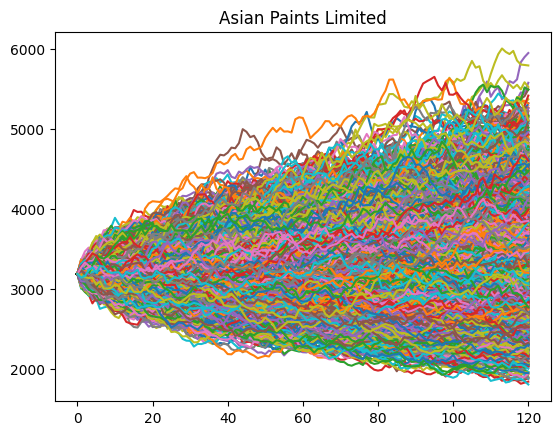

In [60]:
sample_pathh = np.array(sample_path['Asian Paints Limited'])
print(sample_pathh)
plt.figure()
for path in sample_pathh:
    plt.plot(path)
    plt.title("Asian Paints Limited")
plt.show()

In [61]:
#Considering the risk-free rate to be as that of April 15's, Rf = 7.18 %
#Sharpe Ratio =         mean return - Rf
#               ___________________________________
#             standard deviation of stock's returns
annualized_rate = 0.0718
daily_risk_free_rate = (1 + annualized_rate)**(1/365) - 1
mean_daily_returns = {}
daily_volatilities = {}
sharpe_ratios = {}
for stock in sample_path.keys():
    sample_pathh = np.array(sample_path[stock])#Array of all paths for this stock

    mean_daily_returns[stock] = []
    daily_volatilities[stock] = []
    sharpe_ratios[stock] = []

    #Process each path
    for path in sample_pathh:
        #Calculate daily returns
        daily_returns = np.diff(path) / path[:-1]

        #Calculate mean daily return
        mean_return = np.mean(daily_returns)

        #Calculate daily volatility
        volatility = np.std(daily_returns)

        #Calculate Sharpe Ratio
        sharpe_ratio = (mean_return - daily_risk_free_rate) / volatility

        mean_daily_returns[stock].append(mean_return)
        daily_volatilities[stock].append(volatility)
        sharpe_ratios[stock].append(sharpe_ratio)
sharpe_ratios = pd.DataFrame(sharpe_ratios)

mean_sharperatio = {}
for stock in sharpe_ratios.keys():
  mean_sharperatio[stock] = sharpe_ratios[stock].mean()
mean_sharperatio = (pd.Series(mean_sharperatio)).tolist()
print(mean_sharperatio)

[-0.006299515244687207, 0.004869842735755216, -0.011069437668314674, -0.018015109634141307, 0.001826604818852161, 0.021896214645753555, -0.031744610394746076, -0.013681887376801352, 0.018850577514025284, 0.011074481235703799, 0.03450346336985679, 0.11331430548949759, -0.0009257405924306057, 0.07476629652884197, 0.03935054956036662, -0.07100264356606012, 0.034396496306559755, 0.00958798791934382, 0.002142828535175678, 0.03345244563742001, 0.051047958841514245, 0.026488876573220035, 0.04639404442137799, -0.019807155397304217, 0.08192959747096423, 0.058469196322701034, 0.08490369093220652, 0.027387484992329472, 0.033148768057561596, 0.018315997182022887]


In [62]:
df = pd.read_excel('weights_stocks.xlsx', sheet_name='Sheet1', header=None)

weights = df.iloc[0].tolist()
print(weights)

[1.88318178437795e-07, 1.86542405544459e-07, 3.96232909834408e-14, 1.87567263085514e-07, 1.9011800358528e-07, 0.0433872052658207, 1.88301147151679e-07, 1.91304902807356e-07, 3.90201648014308e-09, 2.53698149037373e-07, 1.88449737922181e-07, 0.552867688665508, 1.93568484298551e-07, 0.221782427854779, 0.0099610660359344, 1.87839137738445e-07, 1.90519046402435e-07, 0.00514438630941503, 1.87453973389843e-07, 0.0076610463279256, 0.105901869303519, 1.43073360266265e-07, 0.0532916405329494, 1.89048303498624e-07, -1.09523158630771e-16, -1.21845625287768e-16, 2.64270250025171e-17, -2.14373831816571e-16, -1.0007297534835e-16, -9.29078482632779e-17]


In [63]:
#taking care of floating point precision error
weights=[x if x >= 0 else 0 for x in weights]
print(weights)

[1.88318178437795e-07, 1.86542405544459e-07, 3.96232909834408e-14, 1.87567263085514e-07, 1.9011800358528e-07, 0.0433872052658207, 1.88301147151679e-07, 1.91304902807356e-07, 3.90201648014308e-09, 2.53698149037373e-07, 1.88449737922181e-07, 0.552867688665508, 1.93568484298551e-07, 0.221782427854779, 0.0099610660359344, 1.87839137738445e-07, 1.90519046402435e-07, 0.00514438630941503, 1.87453973389843e-07, 0.0076610463279256, 0.105901869303519, 1.43073360266265e-07, 0.0532916405329494, 1.89048303498624e-07, 0, 0, 2.64270250025171e-17, 0, 0, 0]


In [64]:
stock_data_test = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2023-10-23', end = '2024-04-23')
    stock_data_test[stock_names[ticker]] = hist['Close']

prices_df_test = pd.DataFrame(stock_data_test)
print(len(prices_df_test))
daily_returns = prices_df_test.pct_change()

weighted_returns = daily_returns.multiply(weights, axis='columns')

portfolio_daily_returns = weighted_returns.sum(axis=1)

total_portfolio_return = (portfolio_daily_returns + 1).prod() - 1

print("Daily Portfolio Returns:")
print(portfolio_daily_returns)
print("Total Portfolio Return over the Period:")
print(total_portfolio_return)


120
Daily Portfolio Returns:
Date
2023-10-23 00:00:00+05:30    0.000000
2023-10-25 00:00:00+05:30   -0.008664
2023-10-26 00:00:00+05:30   -0.004894
2023-10-27 00:00:00+05:30    0.004654
2023-10-30 00:00:00+05:30   -0.002031
                               ...   
2024-04-15 00:00:00+05:30   -0.011067
2024-04-16 00:00:00+05:30   -0.004561
2024-04-18 00:00:00+05:30   -0.010358
2024-04-19 00:00:00+05:30    0.005612
2024-04-22 00:00:00+05:30    0.008769
Length: 120, dtype: float64
Total Portfolio Return over the Period:
0.1243138843899474


So the portfolio achieved a return of 12.43% in a period of 6 months. This is an extra 8.84% return over the risk-free rate